In [165]:
#Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress


In [166]:
# Store filepaths into variables
total_asset_loan_value_csv = Path("Resources/Total Loan Assets.csv")
average_rate_of_financed_loan_csv = Path("Resources/Average Loan Finance.csv")
average_amount_financed_csv= Path("Resources/Average Amount Financed.csv")

In [167]:
# Read the CSV files
total_asset_loan_value_df = pd.read_csv(total_asset_loan_value_csv)
average_rate_of_financed_loan_df = pd.read_csv(average_rate_of_financed_loan_csv)
average_amount_financed_df = pd.read_csv(average_amount_financed_csv)

In [168]:
#Dispay the data
total_asset_loan_value_df.head()

,DATE,QBPBSTASLNINDVOLNINDCARLN
0,2014-07-01,379531.304
1,2014-10-01,385156.262
2,2015-01-01,389633.848
3,2015-04-01,397633.220
4,2015-07-01,407873.676


In [169]:
#Rename Columns & Change to Float
total_asset_loan_value_df = total_asset_loan_value_df.rename(columns={"QBPBSTASLNINDVOLNINDCARLN": "Total Loan Amount"})
total_asset_loan_value_df.head()

,DATE,Total Loan Amount
0,2014-07-01,379531.304
1,2014-10-01,385156.262
2,2015-01-01,389633.848
3,2015-04-01,397633.220
4,2015-07-01,407873.676


In [170]:
total_asset_loan_value_df = pd.DataFrame(total_asset_loan_value_df)
total_asset_loan_value_df["Total Loan Amount Millions"] = total_asset_loan_value_df["Total Loan Amount"] * 1000000
total_asset_loan_value_df = total_asset_loan_value_df.dropna()
total_asset_loan_value_df["Total Loan Amount Millions"] = total_asset_loan_value_df["Total Loan Amount Millions"].astype('int64')
total_asset_loan_value_df

,DATE,Total Loan Amount,Total Loan Amount Millions
0,2014-07-01,379531.304,379531304000
1,2014-10-01,385156.262,385156262000
2,2015-01-01,389633.848,389633848000
3,2015-04-01,397633.220,397633220000
4,2015-07-01,407873.676,407873676000
5,2015-10-01,414814.820,414814820000
6,2016-01-01,421831.359,421831359000
7,2016-04-01,430643.614,430643614000
8,2016-07-01,437916.362,437916362000
9,2016-10-01,441837.209,441837209000


In [171]:
average_rate_of_financed_loan_df.head()

,DATE,RIELPCFANNM
0,2014-07-01,4.68
1,2014-10-01,4.82
2,2015-01-01,5.19
3,2015-04-01,5.38
4,2015-07-01,4.92


In [172]:
#Rename Columns
average_rate_of_financed_loan_df = average_rate_of_financed_loan_df.rename(columns={"RIELPCFANNM": "Average Loan Rate"})
average_rate_of_financed_loan_df['Average Loan Rate'] = pd.to_numeric(average_rate_of_financed_loan_df['Average Loan Rate'], errors='coerce').fillna(0.0)
average_rate_of_financed_loan_df.head()

,DATE,Average Loan Rate
0,2014-07-01,4.68
1,2014-10-01,4.82
2,2015-01-01,5.19
3,2015-04-01,5.38
4,2015-07-01,4.92


In [173]:
average_rate_of_financed_loan_df["Average Loan Rate % by Quatre"] = average_rate_of_financed_loan_df["Average Loan Rate"] / 100 * 4
average_rate_of_financed_loan_df.head()

,DATE,Average Loan Rate,Average Loan Rate % by Quatre
0,2014-07-01,4.68,0.1872
1,2014-10-01,4.82,0.1928
2,2015-01-01,5.19,0.2076
3,2015-04-01,5.38,0.2152
4,2015-07-01,4.92,0.1968


In [174]:
average_amount_financed_df.head()

,DATE,DTCTLVENANM
0,2014-07-01,26370.63
1,2014-10-01,26755.30
2,2015-01-01,27272.36
3,2015-04-01,26932.27
4,2015-07-01,27697.60


In [175]:
average_amount_financed_df=average_amount_financed_df.rename(columns={"DTCTLVENANM": "Average Financed Amount"})
average_amount_financed_df['Average Financed Amount'] = pd.to_numeric(average_amount_financed_df['Average Financed Amount'], errors='coerce').fillna(0.0)
average_amount_financed_df.dtypes

DATE                        object
Average Financed Amount    float64
dtype: object

In [176]:
#Merge the dataframes
revenue_rate_df = pd.merge(total_asset_loan_value_df, average_rate_of_financed_loan_df, on="DATE")
revenue_rate_df.dtypes

DATE                              object
Total Loan Amount                float64
Total Loan Amount Millions         int64
Average Loan Rate                float64
Average Loan Rate % by Quatre    float64
dtype: object

In [177]:
#Merge the dataframes
clean_df = pd.merge(revenue_rate_df, average_amount_financed_df, on="DATE")
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount
0,2014-07-01,379531.304,379531304000,4.68,0.1872,26370.63
1,2014-10-01,385156.262,385156262000,4.82,0.1928,26755.30
2,2015-01-01,389633.848,389633848000,5.19,0.2076,27272.36
3,2015-04-01,397633.220,397633220000,5.38,0.2152,26932.27
4,2015-07-01,407873.676,407873676000,4.92,0.1968,27697.60


In [178]:
#Calculate average amount financed by and multiply by the average rate of that period = give us new total of revenue generated during that month
clean_df.dtypes

DATE                              object
Total Loan Amount                float64
Total Loan Amount Millions         int64
Average Loan Rate                float64
Average Loan Rate % by Quatre    float64
Average Financed Amount          float64
dtype: object

In [179]:
clean_df["Revenue Generated"] = clean_df["Average Financed Amount"] * clean_df["Average Loan Rate % by Quatre"] + clean_df["Average Financed Amount"]
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount,Revenue Generated
0,2014-07-01,379531.304,379531304000,4.68,0.1872,26370.63,31307.211936
1,2014-10-01,385156.262,385156262000,4.82,0.1928,26755.30,31913.721840
2,2015-01-01,389633.848,389633848000,5.19,0.2076,27272.36,32934.101936
3,2015-04-01,397633.220,397633220000,5.38,0.2152,26932.27,32728.094504
4,2015-07-01,407873.676,407873676000,4.92,0.1968,27697.60,33148.487680


In [180]:
clean_df.dtypes

DATE                              object
Total Loan Amount                float64
Total Loan Amount Millions         int64
Average Loan Rate                float64
Average Loan Rate % by Quatre    float64
Average Financed Amount          float64
Revenue Generated                float64
dtype: object

In [181]:
clean_df["Total People"] = clean_df["Total Loan Amount Millions"] / clean_df["Revenue Generated"]
clean_df["Total People"] = clean_df["Total People"].astype(int)
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount,Revenue Generated,Total People
0,2014-07-01,379531.304,379531304000,4.68,0.1872,26370.63,31307.211936,12122807
1,2014-10-01,385156.262,385156262000,4.82,0.1928,26755.30,31913.721840,12068672
2,2015-01-01,389633.848,389633848000,5.19,0.2076,27272.36,32934.101936,11830711
3,2015-04-01,397633.220,397633220000,5.38,0.2152,26932.27,32728.094504,12149598
4,2015-07-01,407873.676,407873676000,4.92,0.1968,27697.60,33148.487680,12304442


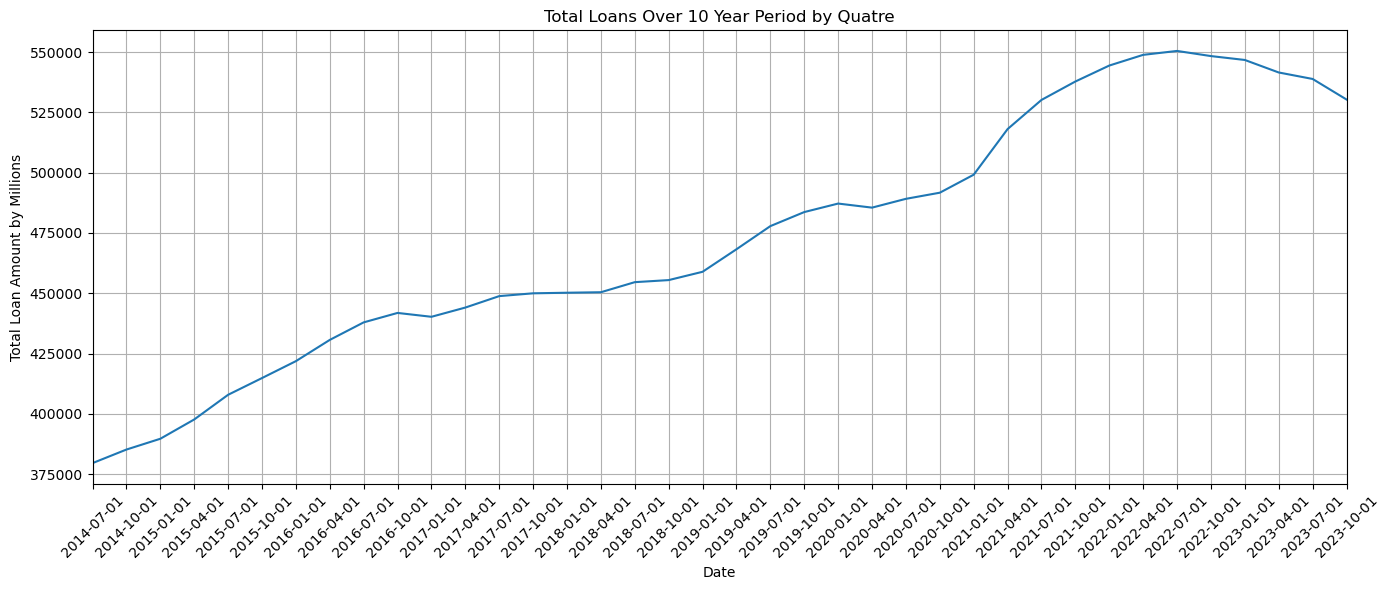

In [182]:
date = clean_df["DATE"]
Total_Loan_Amount = clean_df["Total Loan Amount"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_Loan_Amount)
plt.title("Total Loans Over 10 Year Period by Quatre")
plt.xlabel("Date")
plt.ylabel("Total Loan Amount by Millions")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

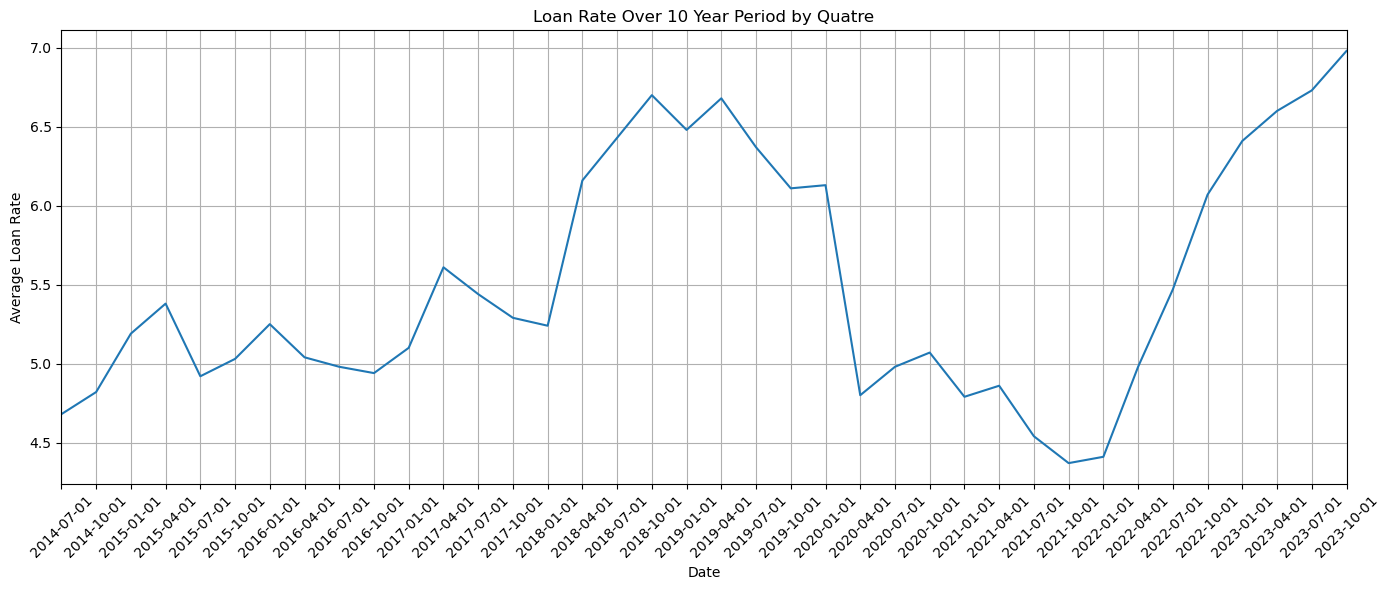

In [183]:
date = clean_df["DATE"]
Average_Loan_Rate = clean_df["Average Loan Rate"]
plt.figure(figsize=(14,6))
plt.plot(date, Average_Loan_Rate)
plt.title("Loan Rate Over 10 Year Period by Quatre")
plt.xlabel("Date")
plt.ylabel("Average Loan Rate")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

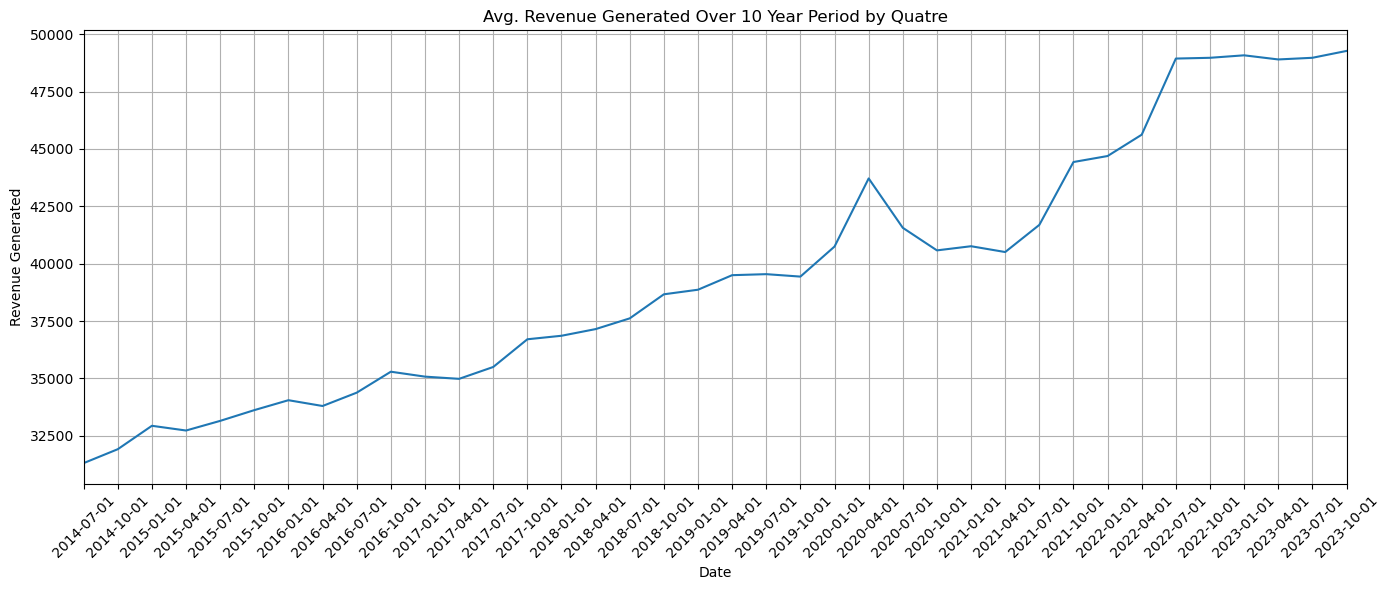

In [185]:
date = clean_df["DATE"]
Revenue_Generated = clean_df["Revenue Generated"]
plt.figure(figsize=(14,6))
plt.plot(date, Revenue_Generated)
plt.title("Avg. Revenue Generated Over 10 Year Period by Quatre")
plt.xlabel("Date")
plt.ylabel("Revenue Generated")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

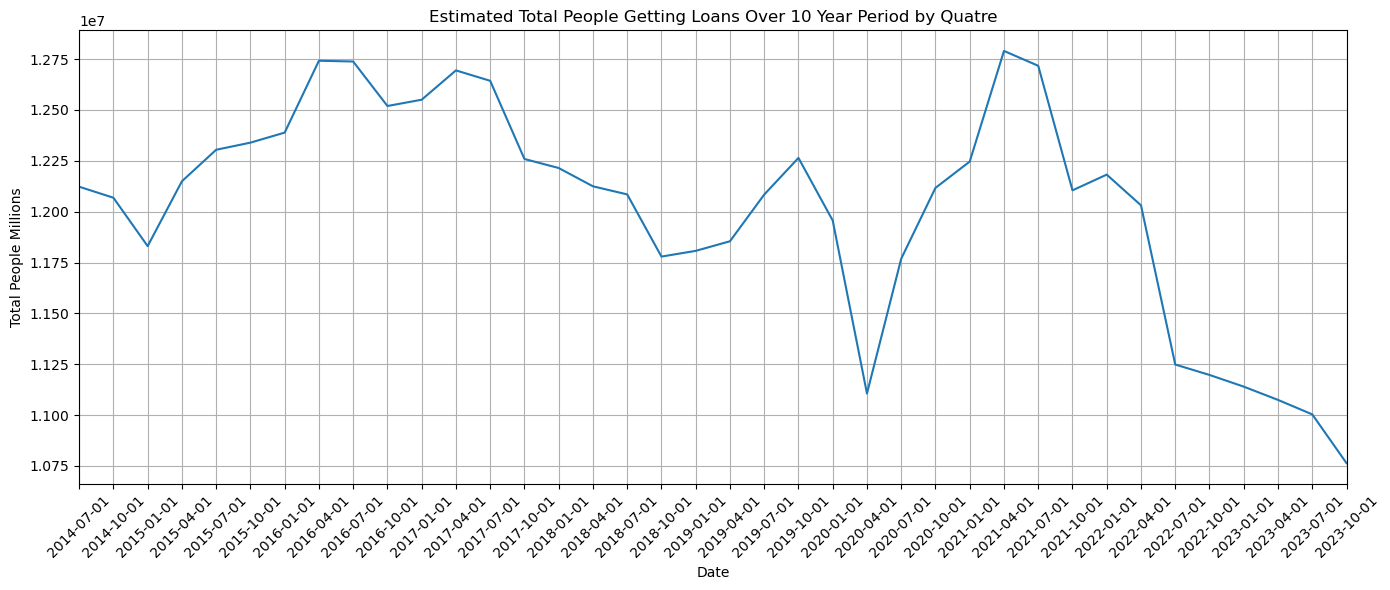

In [188]:
date = clean_df["DATE"]
Total_People = clean_df["Total People"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_People)
plt.title("Estimated Total People Getting Loans Over 10 Year Period by Quatre")
plt.xlabel("Date")
plt.ylabel("Total People Millions")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()